## Lead Scoring Case Study
An education company named X Education sells online courses to industry professionals.The company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
Company want to select the most promising leads, i.e. the leads that are most likely to convert into paying customers.
The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [96]:
from google.colab import drive

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Reading and understanding the data


In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [100]:
#leads = pd.read_csv('C:\\My data\\Upgrad2\\Lead scoring case study\\Lead Scoring Assignment\\Leads.csv')
leads = pd.read_csv('//content//drive//MyDrive//Colab Notebooks//Lead scoring Case Study//Leads.csv')
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [101]:
leads.shape

(9240, 37)

In [102]:
leads_num=leads.describe() # leads_num is dataframe of numerical variables
leads_num

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Looks like there is no any serius outliers and values are growing smoothly.

In [103]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [104]:
# change of datatype may be required - TotalVisits,Page Views Per Visit. Categorical variables have type object.

# 2. Data Preparation

### Missing value treatment

In [105]:
#missing value treatment
round(leads.isnull().sum()/len(leads.index),2)*100 # % of missing records

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [106]:
#Removing missing values with high % and looking relevance
leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Asymmetrique Profile Index','Lead Quality','Tags','Lead Profile','What is your current occupation','What matters most to you in choosing a course','Country'],axis =1,inplace = True)

In [107]:
round(leads.isnull().sum()/len(leads.index),2)*100 # % of missing records

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Specialization                              16.0
How did you hear about X Education          24.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendations                      0.0
Receive More Updates

In [108]:
# looking remaining missing values
round(leads['How did you hear about X Education'].value_counts(normalize = True)*100,2)

Select                   71.70
Online Search            11.49
Word Of Mouth             4.95
Student of SomeSchool     4.41
Other                     2.64
Multiple Sources          2.16
Advertisements            1.00
Social Media              0.95
Email                     0.37
SMS                       0.33
Name: How did you hear about X Education, dtype: float64

In [109]:
#Since 'Select' label is even > 70 % and is is just a null vallue, lets delete this columns
leads=leads.drop(['How did you hear about X Education'],axis =1)

In [110]:
round(leads['Specialization'].value_counts(normalize = True)*100,2)

Select                               24.89
Finance Management                   12.51
Human Resource Management            10.87
Marketing Management                 10.74
Operations Management                 6.45
Business Administration               5.17
IT Projects Management                4.69
Supply Chain Management               4.47
Banking, Investment And Insurance     4.33
Media and Advertising                 2.60
Travel and Tourism                    2.60
International Business                2.28
Healthcare Management                 2.04
Hospitality Management                1.46
E-COMMERCE                            1.44
Retail Management                     1.28
Rural and Agribusiness                0.94
E-Business                            0.73
Services Excellence                   0.51
Name: Specialization, dtype: float64

In [111]:
# replacing missing value with most common value
leads['Specialization'] = leads['Specialization'].fillna(leads['Specialization'].mode()[0])

In [112]:
# replacing labels of 'Specialization' with less than 7% as other
varlist = ['Operations Management','IT Projects Management','Supply Chain Management','Banking, Investment And Insurance','Travel and Tourism','Media and Advertising','International Business','Healthcare Management','Hospitality Management','E-COMMERCE','Retail Management','Rural and Agribusiness','E-Business','Services Excellence','Business Administration']

In [113]:
leads['Specialization']=leads['Specialization'].replace(to_replace=varlist,value = 'Other')    

In [114]:
round(leads['Specialization'].value_counts(normalize = True)*100,2)

Select                       36.58
Other                        34.61
Finance Management           10.56
Human Resource Management     9.18
Marketing Management          9.07
Name: Specialization, dtype: float64

In [115]:
# lets replace label 'select' with other
leads['Specialization']=leads['Specialization'].replace(to_replace = 'Select' , value = 'Other')

In [116]:
round(leads['Specialization'].value_counts(normalize = True)*100,2)

Other                        71.19
Finance Management           10.56
Human Resource Management     9.18
Marketing Management          9.07
Name: Specialization, dtype: float64

In [117]:
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].mean())

In [118]:
#Checking is there any null value.
leads['TotalVisits'].isnull().sum()

0

In [119]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mean())

In [120]:
round(leads.isnull().sum()/len(leads.index),2)*100 # % of missing records

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  0.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         0.0
Last Activity                                1.0
Specialization                               0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendations                      0.0
Receive More Updates About Our Courses       0.0
Update me on Supply 

In [121]:
round(leads['City'].value_counts(normalize = True)*100,2)

Mumbai                         41.20
Select                         28.76
Thane & Outskirts               9.62
Other Cities                    8.77
Other Cities of Maharashtra     5.84
Other Metro Cities              4.86
Tier II Cities                  0.95
Name: City, dtype: float64

In [122]:
#replacing missing cities with most common city
leads['City'] = leads['City'].fillna(leads['City'].mode()[0])
#Replacing Smaller % cities including 'Select' 
varlist_city = ['Select','Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities']
leads['City'] = leads['City'].replace(to_replace = varlist_city , value = 'Other')
round(leads['City'].value_counts(normalize = True)*100,2)

Mumbai               50.24
Other                41.62
Thane & Outskirts     8.14
Name: City, dtype: float64

In [123]:
round(leads['Lead Source'].value_counts(normalize = True)*100,2)

Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Social Media          0.02
Press_Release         0.02
Live Chat             0.02
testone               0.01
youtubechannel        0.01
Pay per Click Ads     0.01
NC_EDM                0.01
WeLearn               0.01
blog                  0.01
welearnblog_Home      0.01
Name: Lead Source, dtype: float64

In [124]:
# replace 'Lead Source' with most common value
leads['Lead Source'] = leads['Lead Source'].fillna(leads['Lead Source'].mode()[0])
leads['Lead Source']

0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object

In [125]:
#Replacing Smaller % 'Lead Source' with other
vallist = ['NC_EDM','WeLearn','blog','youtubechannel','Pay per Click Ads','testone','welearnblog_Home','Live Chat','Press_Release','Social Media','Click2call','google','Facebook','Referral Sites','Welingak Website','bing']
leads['Lead Source'] = leads['Lead Source'].replace(to_replace = vallist , value = 'Other')
round(leads['Lead Source'].value_counts(normalize = True)*100,2)

Google            31.43
Direct Traffic    27.52
Olark Chat        18.99
Organic Search    12.49
Reference          5.78
Other              3.79
Name: Lead Source, dtype: float64

In [126]:
# replacing 'Last Activity' rows having missing labels with most common value
leads['Last Activity'] = leads['Last Activity'].fillna(leads['Last Activity'].mode()[0])


In [127]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

#### Now we do not have any missing value in the data


In [128]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [129]:
leads.shape

(9240, 26)

#### converting binary categorical variables into 0 & 1


In [130]:
Var_list = ['Do Not Email','Do Not Call','Search','Newspaper Article','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','X Education Forums','Newspaper','Get updates on DM Content','Magazine']

In [131]:
leads[Var_list] = leads[Var_list].apply(lambda x : x.map({'Yes' : 1,'No' : 0}))

In [132]:
leads_binary = pd.DataFrame(leads[Var_list])

In [133]:
type(leads_binary)

pandas.core.frame.DataFrame

In [134]:
leads_binary.shape

(9240, 14)

In [135]:
leads.shape

(9240, 26)

In [136]:
leads_binary.head(2)

,Do Not Email,Do Not Call,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,X Education Forums,Newspaper,Get updates on DM Content,Magazine
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
#Dropping binary variables from dataframe 'leads'  and then concatenatig dataframes leads & leads_binary
leads = leads.drop(['Do Not Email','Do Not Call','Search','Newspaper Article','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','X Education Forums','Newspaper','Get updates on DM Content'],axis =1)

In [138]:
leads = pd.concat([leads ,leads_binary] , axis =1)

In [139]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Magazine,City,Last Notable Activity,Do Not Email,Do Not Call,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,X Education Forums,Newspaper,Get updates on DM Content,Magazine
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,0,Other,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,0,Other,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [140]:
leads.shape

(9240, 27)

In [141]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Magazine', 'City',
       'Last Notable Activity', 'Do Not Email', 'Do Not Call', 'Search',
       'Newspaper Article', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'X Education Forums',
       'Newspaper', 'Get updates on DM Content', 'Magazine'],
      dtype='object')

#### encoding mutiple lable categorical variables 

In [142]:
#creating dataframe of mutiple lable categorical variables 
leads_cat = leads.select_dtypes(exclude = ['float','int64'])

In [143]:
leads_cat.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'City', 'Last Notable Activity'],
      dtype='object')

In [144]:
leads_cat.head(2)

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Other,Other,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Other,Other,Email Opened


In [145]:
#creating dataframe of cat. variables excluding 'Prospect ID'
leads_cat = leads_cat[['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'City', 'Last Notable Activity']]

In [146]:
leads_cat.head(2)

,Lead Origin,Lead Source,Last Activity,Specialization,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Other,Other,Modified
1,API,Organic Search,Email Opened,Other,Other,Email Opened


In [147]:
#creating dummies for multiple label categorical varaibles
leads_cat_dummy = pd.get_dummies(leads_cat[['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'City', 'Last Notable Activity']],drop_first = True)

In [148]:
#dropping multiple_categorical columns from main dataframe leads
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'City', 'Last Notable Activity'],axis =1)

In [149]:
#Cancatenating and storing in dataframe 'leads_final'
leads_final = pd.concat([leads , leads_cat_dummy] , axis = 1)

In [150]:
leads_final.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Do Not Email,Do Not Call,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,X Education Forums,Newspaper,Get updates on DM Content,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other,City_Other,City_Thane & Outskirts,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# 3. Checking for Outliers

In [151]:
numerical_leads_final = leads_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [152]:
numerical_leads_final.describe(percentiles = [0.25,0.5,0.75,0.90,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


#### There is no outliers in data

# 4. Train test split

In [153]:
# remove non predictor variable from 'Converted','Prospect ID'
X = leads_final.drop(['Converted','Prospect ID','Lead Number'] , axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Do Not Email,Do Not Call,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,X Education Forums,Newspaper,Get updates on DM Content,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other,City_Other,City_Thane & Outskirts,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [154]:
X.shape

(9240, 63)

In [155]:
y =  leads_final['Converted'] # This is target variable

In [156]:
type(y)

pandas.core.series.Series

In [157]:
# splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 100)

In [158]:
X_train.shape

(6468, 63)

In [159]:
X_test.shape

(2772, 63)

In [160]:
y_train.shape

(6468,)

In [161]:
y_test.shape

(2772,)

# 5. Feature scaling

In [162]:
sc = StandardScaler()

In [163]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = sc.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [164]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Do Not Email,Do Not Call,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,X Education Forums,Newspaper,Get updates on DM Content,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other,City_Other,City_Thane & Outskirts,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.099483,0.005716,-0.473232,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.288795,-0.691418,0.067847,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.288795,1.365219,1.223999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [165]:
# Checking data imbalance
converted = round((sum(leads_final['Converted'] == 1)/len(leads_final['Converted']))*100,2)
converted

38.54

#### 38 % converion rate implies that data is normal and nearly balanced.

# 6.Correlation analysis

In [166]:
correlation = leads_final.corr()

In [167]:
correlation.head(45)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Do Not Email,Do Not Call,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,X Education Forums,Newspaper,Get updates on DM Content,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other,City_Other,City_Thane & Outskirts,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,1.000000,0.025157,2.199255e-02,0.020329,5.819834e-02,NaN,-0.098529,0.011913,-0.012777,-0.012294,-0.017713,-0.005777,NaN,NaN,NaN,-0.109696,-0.003154,0.004597,NaN,NaN,-0.075012,0.029158,0.104726,7.747658e-03,0.131736,-0.068590,-0.020389,0.160780,0.025042,0.013035,-0.048827,0.025745,-0.021031,0.107735,-0.017607,0.013858,0.003652,0.002579,0.009524,0.005940,-0.137925,0.075807,-0.002317,0.024856,0.014771,-0.010532,-0.001916,0.014781,0.008812,0.025089,0.000284,0.014802,-0.021031,0.076414,-0.012616,0.000619,0.000092,0.080591,-0.031622,0.001868,0.005940,-0.169987,0.007638,-0.002995,0.001500
Converted,0.025157,1.000000,3.009112e-02,0.362483,-3.294266e-03,NaN,-0.135580,0.018581,-0.002261,0.003465,-0.005789,0.018607,NaN,NaN,NaN,-0.039820,-0.008238,-0.008238,NaN,NaN,-0.051236,0.321702,-0.023695,1.313825e-02,0.027221,-0.129459,-0.005879,0.067693,0.270830,-0.117383,-0.120095,-0.039690,0.018581,-0.013850,0.018581,-0.033364,0.040803,-0.210809,-0.083771,0.013138,0.325600,-0.010785,-0.020618,-0.011456,-0.008238,0.047130,0.065853,-0.101196,0.125317,0.039189,-0.039101,-0.035555,0.018581,-0.021955,0.013138,-0.008238,0.043476,-0.244294,-0.072660,-0.036051,0.013138,0.351845,0.036594,-0.012858,-0.008238
TotalVisits,0.021993,0.030091,1.000000e+00,0.218409,5.121246e-01,NaN,0.033609,0.003221,0.049527,0.033757,0.023991,0.034191,NaN,NaN,NaN,0.201580,0.035744,0.014153,NaN,NaN,0.289438,-0.160978,-0.028849,-2.174728e-18,0.102722,-0.310439,0.194048,-0.009455,-0.134488,-0.070590,-0.045765,-0.022107,0.001694,0.021055,0.006274,0.012377,0.016926,-0.139381,0.224961,-0.007439,-0.005016,0.016185,0.003007,0.021451,0.001198,0.062929,0.023552,-0.087471,-0.095443,0.070632,-0.007191,-0.008621,0.001694,0.035791,0.005516,-0.003120,0.022386,-0.105116,-0.037637,0.227620,-0.007439,-0.003923,0.005640,0.000970,0.009834
Total Time Spent on Website,0.020329,0.362483,2.184091e-01,1.000000,3.162623e-01,NaN,-0.046374,0.006801,0.012654,0.011326,0.007607,0.023186,NaN,NaN,NaN,0.168298,0.006195,0.025142,NaN,NaN,0.276009,-0.139681,-0.034926,3.283101e-02,0.199786,-0.376768,0.096123,-0.057897,-0.107361,-0.010555,-0.0285

In top 45 rows, looks like there is no any significant correlation

In [168]:
#Checking correlation in rest rows
correlation.head(50)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Do Not Email,Do Not Call,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,X Education Forums,Newspaper,Get updates on DM Content,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other,City_Other,City_Thane & Outskirts,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,1.000000,0.025157,2.199255e-02,0.020329,5.819834e-02,NaN,-0.098529,0.011913,-0.012777,-0.012294,-0.017713,-0.005777,NaN,NaN,NaN,-0.109696,-0.003154,0.004597,NaN,NaN,-0.075012,0.029158,0.104726,7.747658e-03,0.131736,-0.068590,-0.020389,0.160780,0.025042,0.013035,-0.048827,0.025745,-0.021031,0.107735,-0.017607,0.013858,0.003652,0.002579,0.009524,0.005940,-0.137925,0.075807,-0.002317,0.024856,0.014771,-0.010532,-0.001916,0.014781,0.008812,0.025089,0.000284,0.014802,-0.021031,0.076414,-0.012616,0.000619,0.000092,0.080591,-0.031622,0.001868,0.005940,-0.169987,0.007638,-0.002995,0.001500
Converted,0.025157,1.000000,3.009112e-02,0.362483,-3.294266e-03,NaN,-0.135580,0.018581,-0.002261,0.003465,-0.005789,0.018607,NaN,NaN,NaN,-0.039820,-0.008238,-0.008238,NaN,NaN,-0.051236,0.321702,-0.023695,1.313825e-02,0.027221,-0.129459,-0.005879,0.067693,0.270830,-0.117383,-0.120095,-0.039690,0.018581,-0.013850,0.018581,-0.033364,0.040803,-0.210809,-0.083771,0.013138,0.325600,-0.010785,-0.020618,-0.011456,-0.008238,0.047130,0.065853,-0.101196,0.125317,0.039189,-0.039101,-0.035555,0.018581,-0.021955,0.013138,-0.008238,0.043476,-0.244294,-0.072660,-0.036051,0.013138,0.351845,0.036594,-0.012858,-0.008238
TotalVisits,0.021993,0.030091,1.000000e+00,0.218409,5.121246e-01,NaN,0.033609,0.003221,0.049527,0.033757,0.023991,0.034191,NaN,NaN,NaN,0.201580,0.035744,0.014153,NaN,NaN,0.289438,-0.160978,-0.028849,-2.174728e-18,0.102722,-0.310439,0.194048,-0.009455,-0.134488,-0.070590,-0.045765,-0.022107,0.001694,0.021055,0.006274,0.012377,0.016926,-0.139381,0.224961,-0.007439,-0.005016,0.016185,0.003007,0.021451,0.001198,0.062929,0.023552,-0.087471,-0.095443,0.070632,-0.007191,-0.008621,0.001694,0.035791,0.005516,-0.003120,0.022386,-0.105116,-0.037637,0.227620,-0.007439,-0.003923,0.005640,0.000970,0.009834
Total Time Spent on Website,0.020329,0.362483,2.184091e-01,1.000000,3.162623e-01,NaN,-0.046374,0.006801,0.012654,0.011326,0.007607,0.023186,NaN,NaN,NaN,0.168298,0.006195,0.025142,NaN,NaN,0.276009,-0.139681,-0.034926,3.283101e-02,0.199786,-0.376768,0.096123,-0.057897,-0.107361,-0.010555,-0.0285

### We do not find any significant correlation here

# 7. Model building

In [169]:
import statsmodels.api as sm

In [170]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 06 Feb 2021   Deviance:                          nan
Time:                        19:21:01   Pearson chi2:                 8.49e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               3.419e+15   2.58e+07   1.33e+08      0.000    3.42e+15    3.42e+15
TotalVisits                                         4.743e+13   9.92e+05   4.78e+07      0.000    4.74e+13    4.74e+13
Total Time Spent on Website                         1.911e+14   9.41e+05   2.03e+08      0.000    1.91e+14    1.91e+14
Page Views Per Visit                                1.357e+14   1.18e+06   1.15e+08      0.000    1.36e+14    1.36e+14
Magazine                                             -43.3610   2.61e-07  -1.66e+08      0.000     -43.361     -43.361
Do Not Email                                       -2.635e+14   4.41e+06  -5.97e+07      0.000   -2.64e+14   -2.64e+14
Do Not Call                                         6.767e+15   4.76e+07   1.42e+08      0.000    6.77e+15    6.77e+15
Search                                             -4.272e+14    2.2e+07  -1.94e+07      0.000   -4.27e+14   -4.27e+14
Newspaper Article                                   6.006e+15   6.73e+07   8.93e+07      0.000    6.01e+15    6.01e+15
Digital Advertisement                              -2.769e+15   4.76e+07  -5.82e+07      0.000   -2.77e+15   -2.77e+15
Through Recommendations                             7.141e+13   2.85e+07    2.5e+06      0.000    7.14e+13    7.14e+13
Receive More Updates About Our Courses               -11.8997   3.32e-07  -3.59e+07      0.000     -11.900     -11.900
Update me on Supply Chain Content                    -26.9572   2.63e-07  -1.03e+08      0.000     -26.957     -26.957
I agree to pay the amount through cheque             -10.2892    1.3e-07  -7.89e+07      0.000     -10.289     -10.289
A free copy of Mastering The Interview               4.44e+12   2.48e+06   1.79e+06      0.000    4.44e+12    4.44e+12
X Education Forums                                 -4.909e+15   1.11e+08  -4.42e+07      0.000   -4.91e+15   -4.91e+15
Newspaper                                          -3.566e+15   6.73e+07   -5.3e+07      0.000   -3.57e+15   -3.57e+15
Get updates on DM Content                             -7.4878   2.05e-07  -3.64e+07      0.000      -7.488      -7.488
Magazine                                               9.2790   1.36e-07   6.83e+07      0.000       9.279       9.279
Lead Origin_Landing Page Submission                 1.061e+14   2.61e+06   4.06e+07      0.000    1.06e+14    1.06e+14
Lead Origin_Lead Add Form                           1.644e+15   7.85e+06    2.1e+08      0.000    1.64e+15    1.64e+15
Lead Origin_Lead Import                             4.591e+14   1.31e+07    3.5e+07      0.000    4.59e+14    4.59e+14
Lead Origin_Quick Add Form                          5.241e+15   6.74e+07   7.78e+07      0.000    5.24e+15  

#### Significance level (p value ) looks great for all variables !. Lets go with RFE for feature selection as next step.

## Feature Selection Using RFE

In [171]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [172]:
from sklearn.feature_selection import RFE
rfe = RFE(linreg , 25)
rfe = rfe.fit(X_train , y_train)

In [173]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False,  True, False, False, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False])

In [174]:
list(zip(X_train.columns , rfe.support_ , rfe.ranking_))

[('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Magazine', False, 30),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('Search', False, 15),
 ('Newspaper Article', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 31),
 ('Update me on Supply Chain Content', False, 34),
 ('I agree to pay the amount through cheque', False, 32),
 ('A free copy of Mastering The Interview', False, 38),
 ('X Education Forums', True, 1),
 ('Newspaper', True, 1),
 ('Get updates on DM Content', False, 35),
 ('Magazine', False, 33),
 ('Lead Origin_Landing Page Submission', False, 28),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Other', False, 20

In [175]:
rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

Index(['Total Time Spent on Website', 'Do Not Email', 'Do Not Call',
       'Newspaper Article', 'Digital Advertisement', 'Through Recommendations',
       'X Education Forums', 'Newspaper', 'Lead Origin_Lead Add Form',
       'Lead Origin_Quick Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [176]:
rfe_not_support_col =  X_train.columns[~rfe.support_]
rfe_not_support_col

Index(['TotalVisits', 'Page Views Per Visit', 'Magazine', 'Search',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Get updates on DM Content',
       'Magazine', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Reference', 'Last Activity_Email Marked Spam',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management', 'Specialization_Other',
       'City_Other', 'City_Thane & Outskirts',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email 

## Assessing the model with StatsModels

In [177]:
X_train_sm = sm.add_constant(X_train[rfe_support_col])
lg2 = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial())
res = lg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.2
Date:                Sat, 06 Feb 2021   Deviance:                       5814.4
Time:                        19:21:02   Pearson chi2:                 6.63e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.0065      0.058      0.110      0.912      -0.108       0.121
Total Time Spent on Website                    1.1085      0.038     29.061      0.000       1.034       1.183
Do Not Email                                  -1.2456      0.199     -6.269      0.000      -1.635      -0.856
Do Not Call                                   21.9612   3.38e+04      0.001      0.999   -6.61e+04    6.62e+04
Newspaper Article                             22.6287   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Digital Advertisement                        -22.0416   3.37e+04     -0.001      0.999   -6.62e+04    6.61e+04
Through Recommendations                        2.3489      1.211      1.940      0.052      -0.025       4.723
X Education Forums                           -24.5366   7.61e+04     -0.000      1.000   -1.49e+05    1.49e+05
Newspaper                                    -24.1402   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                      3.9684      0.177     22.390      0.000       3.621       4.316
Lead Origin_Quick Add Form                    22.4355   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                         1.0804      0.098     11.007      0.000       0.888       1.273
Last Activity_Converted to Lead               -2.3589      0.207    -11.369      0.000      -2.766      -1.952
Last Activity_Email Bounced                   -2.1454      0.344     -6.232      0.000      -2.820      -1.471
Last Activity_Email Link Clicked              -1.6557      0.209     -7.912      0.000      -2.066      -1.246
Last Activity_Email Opened                    -1.1260      0.075    -15.074      0.000      -1.272      -0.980
Last Activity_Email Received                  21.5562   3.31e+04      0.001      0.999   -6.48e+04    6.48e+04
Last Activity_Form Submitted on Website       -1.6643      0.315     -5.290      0.000      -2.281      -1.048
Last Activity_Olark Chat Conversation         -2.6489      0.164    -16.140      0.000      -2.971      -2.327
Last Activity_Page Visited on Website         -1.6415      0.141    -11.601      0.000      -1.919      -1.364
Last Activity_Resubscribed to emails          22.4606   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Unreachable                     -2.6487      0.646     -4.098      0.000      -3.916      -1.382
Last Activity_Unsubscribed                    -0.5363      0.469     -1.144      0.253      -1.455       0.382
Last Activity_View in browser link Clicked    -1.4379      1.219     -1.180      0.238      -3.827       0.951
Last Activity_Visited Booth in Tradeshow     -21.8690   4.82e+04     -0.000      1.000

In [178]:
#Getting predicted value of train_set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.264912
6795    0.247271
3516    0.308829
8105    0.820504
3934    0.264912
4844    0.888096
3297    0.126909
8071    0.975519
987     0.156977
7423    0.899814
dtype: float64

In [179]:
y_train_pred.dtype

dtype('float64')

In [180]:
# converting y_train_pred into array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26491237, 0.24727121, 0.30882916, 0.82050364, 0.26491237,
       0.88809621, 0.12690942, 0.97551922, 0.15697662, 0.89981425])

#### Creating dataframe of actual conversion and predicted conversion

In [181]:
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values , 'Converted_pred' : y_train_pred})
y_train_pred_final['LeadID'] = y_train.index # adding column 'LeadID' in dataframe
y_train_pred_final[:10]

,Converted,Converted_pred,LeadID
0,0,0.264912,1871
1,0,0.247271,6795
2,0,0.308829,3516
3,0,0.820504,8105
4,0,0.264912,3934
5,1,0.888096,4844
6,0,0.126909,3297
7,1,0.975519,8071
8,0,0.156977,987
9,1,0.899814,7423


In [182]:
#Creating new column for predicted conversion
y_train_pred_final['Predicted_conversion'] = y_train_pred_final.Converted_pred.map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final[:10]

,Converted,Converted_pred,LeadID,Predicted_conversion
0,0,0.264912,1871,0
1,0,0.247271,6795,0
2,0,0.308829,3516,0
3,0,0.820504,8105,1
4,0,0.264912,3934,0
5,1,0.888096,4844,1
6,0,0.126909,3297,0
7,1,0.975519,8071,1
8,0,0.156977,987,0
9,1,0.899814,7423,1


In [183]:
# Checking accuracy
from sklearn import metrics

In [184]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)
print(confusion)

[[3501  501]
 [ 794 1672]]


In [185]:
# Let's check the overall accuracy.
Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)
print("Accuracy = " , Accuracy)

Accuracy =  0.7997835497835498


## Checking VIFs to remove redundant variables

In [186]:
#Checking VIF value for feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [187]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,X Education Forums,2.67
1,Do Not Email,2.06
3,Newspaper Article,2.00
12,Last Activity_Email Bounced,1.88
10,Lead Source_Olark Chat,1.67
20,Last Activity_Unreachable,1.59
24,Last Notable Activity_Unreachable,1.59
4,Digital Advertisement,1.50
17,Last Activity_Olark Chat Conversation,1.39
0,Total Time Spent on Website,1.18


In [188]:
# removing variables with extremely high VIFs first


In [189]:
rfe_support_col = rfe_support_col.drop(['Last Activity_Resubscribed to emails'],1)

In [190]:
# running model again with selected variables
X_train_sm = sm.add_constant(X_train[rfe_support_col])
lg3 = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial())
res = lg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.8
Date:                Sat, 06 Feb 2021   Deviance:                       5815.7
Time:                        19:21:03   Pearson chi2:                 6.63e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.0074      0.058      0.127      0.899      -0.107       0.122
Total Time Spent on Website                    1.1085      0.038     29.058      0.000       1.034       1.183
Do Not Email                                  -1.2466      0.199     -6.274      0.000      -1.636      -0.857
Do Not Call                                   21.9625   3.38e+04      0.001      0.999   -6.61e+04    6.62e+04
Newspaper Article                             22.6293   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Digital Advertisement                        -22.0426   3.37e+04     -0.001      0.999   -6.62e+04    6.61e+04
Through Recommendations                        2.3494      1.211      1.940      0.052      -0.024       4.723
X Education Forums                           -24.5365   7.61e+04     -0.000      1.000   -1.49e+05    1.49e+05
Newspaper                                    -24.1397   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                      3.9685      0.177     22.390      0.000       3.621       4.316
Lead Origin_Quick Add Form                    22.4360   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                         1.0834      0.098     11.044      0.000       0.891       1.276
Last Activity_Converted to Lead               -2.3599      0.207    -11.374      0.000      -2.767      -1.953
Last Activity_Email Bounced                   -2.1459      0.344     -6.234      0.000      -2.821      -1.471
Last Activity_Email Link Clicked              -1.6577      0.209     -7.923      0.000      -2.068      -1.248
Last Activity_Email Opened                    -1.1276      0.075    -15.099      0.000      -1.274      -0.981
Last Activity_Email Received                  21.5553   3.31e+04      0.001      0.999   -6.48e+04    6.48e+04
Last Activity_Form Submitted on Website       -1.6657      0.315     -5.294      0.000      -2.282      -1.049
Last Activity_Olark Chat Conversation         -2.6519      0.164    -16.161      0.000      -2.974      -2.330
Last Activity_Page Visited on Website         -1.6426      0.141    -11.609      0.000      -1.920      -1.365
Last Activity_Unreachable                     -2.6496      0.646     -4.099      0.000      -3.917      -1.383
Last Activity_Unsubscribed                    -0.5369      0.469     -1.145      0.252      -1.455       0.382
Last Activity_View in browser link Clicked    -1.4396      1.219     -1.181      0.238      -3.829       0.950
Last Activity_Visited Booth in Tradeshow     -21.8700   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Unreachable              3.1654      0.817      3.875      0.000

In [191]:
# lets check the accuracy again with reduced features
#Getting predicted value of train_set
y_train_pred = res.predict(X_train_sm)

y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_final['Predicted_conversion'] = y_train_pred_final.Converted_pred.map(lambda x : 1 if x > 0.5 else 0)

# Accuracy :

Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)
print("Accuracy = " , Accuracy)

Accuracy =  0.7997835497835498


Accuracy is exactly the same after removing redundant variables which is good.

In [192]:
# running the VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,X Education Forums,2.67
1,Do Not Email,2.06
3,Newspaper Article,2.00
12,Last Activity_Email Bounced,1.88
10,Lead Source_Olark Chat,1.67
19,Last Activity_Unreachable,1.59
23,Last Notable Activity_Unreachable,1.59
4,Digital Advertisement,1.50
17,Last Activity_Olark Chat Conversation,1.39
0,Total Time Spent on Website,1.18


In [193]:
# removing less significant variables.VIF at this stage looks fine.We are not able to drop variables on VIF value as all VIF is under control(<5 say )
rfe_support_col = rfe_support_col.drop(['Do Not Call','Newspaper Article','Digital Advertisement','X Education Forums','Newspaper','Lead Origin_Quick Add Form','Last Activity_Email Received','Last Activity_Visited Booth in Tradeshow'],1)

In [194]:
# running model again with selected variables
X_train_sm = sm.add_constant(X_train[rfe_support_col])
lg4 = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial())
res = lg4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.0
Date:                Sat, 06 Feb 2021   Deviance:                       5830.1
Time:                        19:21:03   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.0052      0.058      0.090      0.928      -0.109       0.120
Total Time Spent on Website                    1.1096      0.038     29.152      0.000       1.035       1.184
Do Not Email                                  -1.2432      0.199     -6.256      0.000      -1.633      -0.854
Through Recommendations                        1.5305      0.968      1.582      0.114      -0.366       3.427
Lead Origin_Lead Add Form                      3.9798      0.177     22.447      0.000       3.632       4.327
Lead Source_Olark Chat                         1.0830      0.098     11.049      0.000       0.891       1.275
Last Activity_Converted to Lead               -2.3584      0.208    -11.366      0.000      -2.765      -1.952
Last Activity_Email Bounced                   -2.1096      0.339     -6.219      0.000      -2.774      -1.445
Last Activity_Email Link Clicked              -1.6564      0.209     -7.912      0.000      -2.067      -1.246
Last Activity_Email Opened                    -1.1249      0.075    -15.077      0.000      -1.271      -0.979
Last Activity_Form Submitted on Website       -1.6643      0.315     -5.288      0.000      -2.281      -1.047
Last Activity_Olark Chat Conversation         -2.6404      0.163    -16.176      0.000      -2.960      -2.320
Last Activity_Page Visited on Website         -1.6494      0.142    -11.653      0.000      -1.927      -1.372
Last Activity_Unreachable                     -2.6496      0.647     -4.096      0.000      -3.917      -1.382
Last Activity_Unsubscribed                    -0.5389      0.469     -1.149      0.250      -1.458       0.380
Last Activity_View in browser link Clicked    -1.4373      1.219     -1.179      0.238      -3.827       0.952
Last Notable Activity_Unreachable              3.1700      0.817      3.881      0.000       1.569       4.771
==============================================================================================================
"""

In [195]:
# lets check the accuracy again with reduced features
#Getting predicted value of train_set
y_train_pred = res.predict(X_train_sm)

y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_final['Predicted_conversion'] = y_train_pred_final.Converted_pred.map(lambda x : 1 if x > 0.5 else 0)

# Accuracy :

Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)
print("Accuracy = " , Accuracy)

Accuracy =  0.7997835497835498


Again the accuracy is same.

In [196]:
# running the VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Do Not Email,2.06
6,Last Activity_Email Bounced,1.87
4,Lead Source_Olark Chat,1.67
12,Last Activity_Unreachable,1.59
15,Last Notable Activity_Unreachable,1.59
10,Last Activity_Olark Chat Conversation,1.39
0,Total Time Spent on Website,1.17
8,Last Activity_Email Opened,1.15
13,Last Activity_Unsubscribed,1.14
3,Lead Origin_Lead Add Form,1.07


In [197]:
# Now we will remove variables by observung p value only . VIF is under control
rfe_support_col = rfe_support_col.drop(['Through Recommendations'],1)

In [198]:
# running model again with selected variables
X_train_sm = sm.add_constant(X_train[rfe_support_col])
lg5 = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial())
res = lg5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.3
Date:                Sat, 06 Feb 2021   Deviance:                       5832.6
Time:                        19:21:04   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.0057      0.058      0.098      0.922      -0.109       0.120
Total Time Spent on Website                    1.1095      0.038     29.169      0.000       1.035       1.184
Do Not Email                                  -1.2454      0.199     -6.270      0.000      -1.635      -0.856
Lead Origin_Lead Add Form                      3.9781      0.177     22.439      0.000       3.631       4.326
Lead Source_Olark Chat                         1.0814      0.098     11.039      0.000       0.889       1.273
Last Activity_Converted to Lead               -2.3588      0.207    -11.368      0.000      -2.765      -1.952
Last Activity_Email Bounced                   -2.1076      0.339     -6.214      0.000      -2.772      -1.443
Last Activity_Email Link Clicked              -1.6561      0.209     -7.911      0.000      -2.066      -1.246
Last Activity_Email Opened                    -1.1228      0.075    -15.053      0.000      -1.269      -0.977
Last Activity_Form Submitted on Website       -1.6644      0.315     -5.289      0.000      -2.281      -1.048
Last Activity_Olark Chat Conversation         -2.6397      0.163    -16.172      0.000      -2.960      -2.320
Last Activity_Page Visited on Website         -1.6374      0.141    -11.603      0.000      -1.914      -1.361
Last Activity_Unreachable                     -2.6496      0.647     -4.097      0.000      -3.917      -1.382
Last Activity_Unsubscribed                    -0.5370      0.469     -1.145      0.252      -1.456       0.382
Last Activity_View in browser link Clicked    -1.4373      1.219     -1.179      0.238      -3.827       0.952
Last Notable Activity_Unreachable              3.1830      0.815      3.905      0.000       1.585       4.781
==============================================================================================================
"""

In [199]:
# lets check the accuracy again with reduced features
#Getting predicted value of train_set
y_train_pred = res.predict(X_train_sm)

y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_final['Predicted_conversion'] = y_train_pred_final.Converted_pred.map(lambda x : 1 if x > 0.5 else 0)

# Accuracy :

Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)
print("Accuracy = " , Accuracy)

Accuracy =  0.7997835497835498


Again our accuracy is same meaning that droped variables was not creating any value addition in our model.

In [200]:
# running the VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Do Not Email,2.06
5,Last Activity_Email Bounced,1.87
3,Lead Source_Olark Chat,1.67
11,Last Activity_Unreachable,1.59
14,Last Notable Activity_Unreachable,1.58
9,Last Activity_Olark Chat Conversation,1.39
0,Total Time Spent on Website,1.17
7,Last Activity_Email Opened,1.15
12,Last Activity_Unsubscribed,1.14
2,Lead Origin_Lead Add Form,1.07


In [201]:
# Now we will remove variables by observung p value and VIF
rfe_support_col = rfe_support_col.drop(['Last Activity_Form Submitted on Website'],1)

In [202]:
# running model again with selected variables
X_train_sm = sm.add_constant(X_train[rfe_support_col])
lg6 = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial())
res = lg6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.9
Date:                Sat, 06 Feb 2021   Deviance:                       5865.8
Time:                        19:21:04   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0608      0.057     -1.067      0.286      -0.172       0.051
Total Time Spent on Website                    1.1110      0.038     29.271      0.000       1.037       1.185
Do Not Email                                  -1.2231      0.198     -6.178      0.000      -1.611      -0.835
Lead Origin_Lead Add Form                      3.9979      0.177     22.577      0.000       3.651       4.345
Lead Source_Olark Chat                         1.0935      0.098     11.167      0.000       0.902       1.285
Last Activity_Converted to Lead               -2.2932      0.207    -11.071      0.000      -2.699      -1.887
Last Activity_Email Bounced                   -2.0662      0.339     -6.094      0.000      -2.731      -1.402
Last Activity_Email Link Clicked              -1.5956      0.209     -7.630      0.000      -2.005      -1.186
Last Activity_Email Opened                    -1.0598      0.074    -14.404      0.000      -1.204      -0.916
Last Activity_Olark Chat Conversation         -2.5816      0.163    -15.849      0.000      -2.901      -2.262
Last Activity_Page Visited on Website         -1.5746      0.141    -11.199      0.000      -1.850      -1.299
Last Activity_Unreachable                     -2.5878      0.647     -3.997      0.000      -3.857      -1.319
Last Activity_Unsubscribed                    -0.4946      0.469     -1.055      0.292      -1.414       0.425
Last Activity_View in browser link Clicked    -1.3738      1.219     -1.127      0.260      -3.763       1.016
Last Notable Activity_Unreachable              3.1858      0.816      3.906      0.000       1.587       4.785
==============================================================================================================
"""

In [203]:
# lets check the accuracy again with reduced features
#Getting predicted value of train_set
y_train_pred = res.predict(X_train_sm)

y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_final['Predicted_conversion'] = y_train_pred_final.Converted_pred.map(lambda x : 1 if x > 0.5 else 0)

# Accuracy :

Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)
print("Accuracy = " , Accuracy)

Accuracy =  0.7997835497835498


##  At this stage all variables are looking significant and accoracy is 80 % approx.Now we will keep these variables as predictors.

# 8. Model Evaulation

## Metrics beyond simply accuracy

In [204]:
# Definig all four parts of confusion metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [205]:
# Predicted     not_converted    converted
# Actual
# not_converted       TN      FP
# converted           FN      TP 

In [206]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)
print(confusion)

[[3501  501]
 [ 794 1672]]


In [207]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6780210867802109

#### This means that 68 % have been correctly predicted leads conversion

In [208]:
# Let us calculate specificity
TN / float(TN+FP)

0.8748125937031485

In [209]:
# Calculate false postive rate - predicting conversion when Lead does not have converted
print(FP/ float(TN+FP))

0.12518740629685157


In [210]:
# positive predictive value 
print (TP / float(TP+FP))

0.7694431661297745


In [211]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8151338766006985


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [212]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [213]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion, drop_intermediate = False )

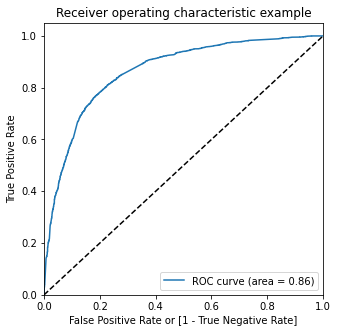

In [214]:
#draw_roc(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [215]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final[:10]

,Converted,Converted_pred,LeadID,Predicted_conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.264912,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.247271,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.308829,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.820504,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.264912,3934,0,1,1,1,0,0,0,0,0,0,0
5,1,0.888096,4844,1,1,1,1,1,1,1,1,1,1,0
6,0,0.126909,3297,0,1,1,0,0,0,0,0,0,0,0
7,1,0.975519,8071,1,1,1,1,1,1,1,1,1,1,1
8,0,0.156977,987,0,1,1,0,0,0,0,0,0,0,0
9,1,0.899814,7423,1,1,1,1,1,1,1,1,1,1,0


In [216]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.565090  0.976480  0.311594
0.2   0.2  0.715368  0.914842  0.592454
0.3   0.3  0.779530  0.828467  0.749375
0.4   0.4  0.798701  0.753447  0.826587
0.5   0.5  0.799784  0.678021  0.874813
0.6   0.6  0.775819  0.552311  0.913543
0.7   0.7  0.758040  0.461882  0.940530
0.8   0.8  0.730056  0.348743  0.965017
0.9   0.9  0.675943  0.170316  0.987506


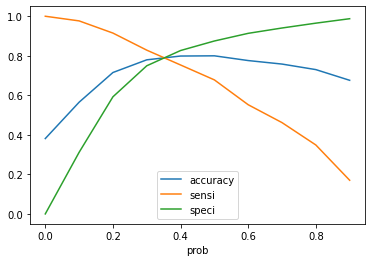

In [217]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line( x= 'prob' , y = ['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [218]:

y_train_pred_final['Predicted_conversion'] = y_train_pred_final.Converted_pred.apply(lambda x : 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_pred,LeadID,Predicted_conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.264912,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.247271,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.308829,3516,1,1,1,1,1,0,0,0,0,0,0
3,0,0.820504,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.264912,3934,0,1,1,1,0,0,0,0,0,0,0


In [219]:
#Checking overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)

0.7795299938157081

In [220]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion )
confusion2

array([[2999, 1003],
       [ 423, 2043]])

In [221]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [222]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8284671532846716

In [223]:
# Let us calculate specificity
TN / float(TN+FP)

0.749375312343828

In [224]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2506246876561719


In [225]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6707156927117531


In [226]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8763880771478667


## Precision and Recall

In [227]:
#Looking at the confusion matrix again

In [228]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion )
confusion

array([[2999, 1003],
       [ 423, 2043]])

##### Precision
TP / TP + FP

In [229]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6707156927117531

##### Recall
TP / TP + FN

In [230]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8284671532846716

Using sklearn utilities for the same

In [231]:
from sklearn.metrics import precision_score, recall_score

In [232]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion )

0.6707156927117531

In [233]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)

0.8284671532846716

### Precision and recall tradeoff

In [234]:
from sklearn.metrics import precision_recall_curve

In [235]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)

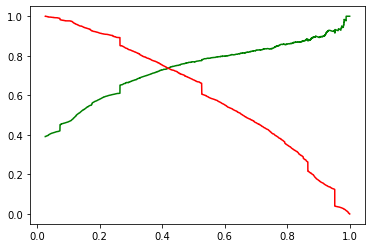

In [236]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [237]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Magazine', 'Do Not Email', 'Do Not Call', 'Search',
       'Newspaper Article', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'X Education Forums',
       'Newspaper', 'Get updates on DM Content', 'Magazine',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Reference', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
   

In [238]:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = sc.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [239]:
X_test = X_test[rfe_support_col]
X_test.head()

,Total Time Spent on Website,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Notable Activity_Unreachable
4269,0.964504,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0
7766,-0.777416,0,0,0,0,0,0,0,0,0,1,0,0,1
9199,-0.885371,0,0,1,0,0,0,0,1,0,0,0,0,0
4359,-0.885371,0,1,0,0,0,0,1,0,0,0,0,0,0


In [240]:
X_test_sm = sm.add_constant(X_test)

In [241]:
y_test_pred = res.predict(X_test_sm)

In [242]:
y_test_pred[:10]

4269    0.733179
2376    0.950429
7766    0.419113
9199    0.073610
4359    0.869177
9186    0.549757
1631    0.488773
8963    0.173730
8007    0.066710
5324    0.327574
dtype: float64

In [243]:
type(y_test_pred)

pandas.core.series.Series

In [244]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [245]:
# Let's see the head
y_pred_1.head()

,0
4269,0.733179
2376,0.950429
7766,0.419113
9199,0.073610
4359,0.869177


In [246]:
# Converting y_test to dataframe which also an array like y_pred
y_test_df = pd.DataFrame(y_test)

In [247]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [248]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [249]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [250]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.733179
1,1,2376,0.950429
2,1,7766,0.419113
3,0,9199,0.073610
4,1,4359,0.869177


In [251]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,1,4269,0.733179
1,1,2376,0.950429
2,1,7766,0.419113
3,0,9199,0.073610
4,1,4359,0.869177


In [252]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,1,4269,0.733179
1,1,2376,0.950429
2,1,7766,0.419113
3,0,9199,0.073610
4,1,4359,0.869177


In [253]:
y_pred_final['Predicted_conversion'] = y_pred_final.Conversion_Prob.apply(lambda x : 1 if x > 0.3 else 0)

In [254]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob,Predicted_conversion
0,1,4269,0.733179,1
1,1,2376,0.950429,1
2,1,7766,0.419113,1
3,0,9199,0.073610,0
4,1,4359,0.869177,1


In [255]:
y_pred_final.shape

(2772, 4)

In [256]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)

0.7795299938157081

In [257]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_conversion)
confusion2

array([[2999, 1003],
       [ 423, 2043]])

In [258]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [259]:
# Let's see the sensitivity of our final logistic regression model
TP / float(TP+FN)

0.8284671532846716

In [260]:
# Let us calculate specificity
TN / float(TN+FP)

0.749375312343828

## Calculating score for all Leads

In [261]:
X = X[rfe_support_col]
X_sm = sm.add_constant(X)


In [262]:
y_pred = res.predict(X_sm) # Predicting for entire dataset

In [263]:
y_pred = pd.DataFrame(y_pred) # converting into DataFrame

In [264]:
y_pred = y_pred.rename(columns = { 0 : 'Lead Score'}) # Assiging score columns

In [265]:
y_pred.head()

,Lead Score
0,0.367747
1,1.000000
2,1.000000
3,1.000000
4,1.000000


In [266]:
#Dataframe for sales team
Sales_df = pd.concat([leads_final , y_pred ],axis =1) # Creating final dataframe with lead score

In [267]:
Sales_df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Do Not Email,Do Not Call,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,X Education Forums,Newspaper,Get updates on DM Content,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other,City_Other,City_Thane & Outskirts,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.367747
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.000000
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.000000
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.000000
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.000000
